      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  395.60  12.43  22.9  
Root Mean Squared Error: 4.44
R-squared: 0.63


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


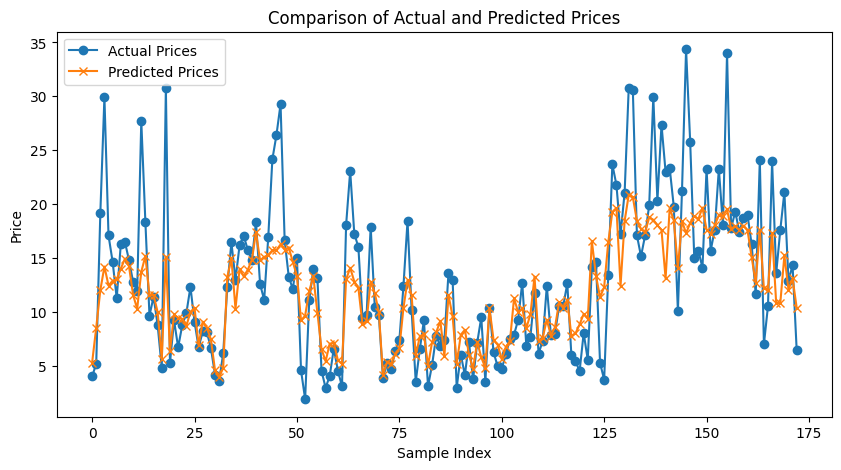

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load the dataset
train_data = pd.read_csv('data/train.csv').drop(columns="ID")
test_data = pd.read_csv('data/test.csv').drop(columns="ID")

# Display the first few rows of the training data
print(train_data.head())

# 2. Prepare the data
target = 'lstat'
X_train = train_data.drop(columns=[target])
y_train = train_data[target]
X_test = test_data.drop(columns=[target])
y_test = test_data[target]

# Ensure columns match between train and test sets
common_columns = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_columns]
X_test = X_test[common_columns]

# 3. Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the SVR model with RBF kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, y_train)

# 5. Predict and evaluate the model
y_pred = svr_rbf.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# 6. Plot the comparison
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', marker='o')
plt.plot(y_pred, label='Predicted Prices', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()
